<div style="border:solid Chocolate 2px; padding: 40px">

<b>Илья, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

### Описание данных

- `entry_date` - дата записи;
- `order_id` - идентификационный номер заказа;
- `customer_id` - идентификационный номер клиента;
- `quantity` -  количество;
- `price` -  цена;
- `name_clust` - автоматически присвоенная группа записи на основе названия;
- `entry_id` - идентификационный номер записи;
- `country_id` - идентификационный номер страны.

### Текстовое описание записей

- `entry_id` - идентификационный номер записи;
- `entry` - запись.

Целью исследования являются данные онлайн-магазина подарков. Известно, что магазин периодически отправляет товары по почте. Работают как с оптовыми, так и с розничными покупателями.
План работы:
1. Шаг 1. Получение, осмотр и объединение данных.
2. Шаг 2. Предобработка и начало исследовательского анализа
3. Шаг 3. Расчёт метрик.
4. Шаг 4. Проведение RFM-сегментацию клиентов.
5. Шаг 5. Проверка статистических гипотез.
6. Шаг 6. Общий вывод.
7. Шаг 7. Дополнительное исследование(какие товары чаще всего покупают вместе).


# Шаг 1. Предобработка данных. Открытие файла с данными и изучение общей информации

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Есьт описание данных, но нет плана работы и цели работы

<div class="alert alert-info">
<b>Done ;)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_gift = pd.read_csv('/datasets/gift.csv')
# Общая информация о датафрейме df_gift
df_gift.info()
df_gift.head()
df_gift.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356940 entries, 0 to 356939
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   356940 non-null  object
 1   order_id     356940 non-null  int64 
 2   customer_id  356940 non-null  int64 
 3   quantity     356940 non-null  int64 
 4   price        356940 non-null  int64 
 5   name_clust   356940 non-null  int64 
 6   entry_id     356940 non-null  int64 
 7   country_id   356940 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 21.8+ MB


,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
count,356940.000000,356940.000000,356940.000000,3.569400e+05,356940.000000,356940.000000,356940.000000
mean,26687.651726,3486.883389,10.149599,3.999940e+02,468.617395,1518.046442,26.751818
std,13381.350493,2542.878257,146.794372,5.059181e+03,259.146901,833.753264,4.978016
min,3031.000000,-1.000000,-9600.000000,-1.106206e+06,0.000000,0.000000,0.000000
25%,14834.000000,-1.000000,1.000000,1.250000e+02,242.000000,875.000000,28.000000
50%,27378.000000,3633.000000,3.000000,2.080000e+02,448.000000,1559.000000,28.000000
75%,38512.000000,5627.500000,10.000000,4.130000e+02,702.000000,2223.000000,28.000000
max,48253.000000,7653.000000,80995.000000,1.354133e+06,929.000000,2916.000000,29.000000


In [4]:
df_entry = pd.read_csv('https://code.s3.yandex.net/python-for-analytics/gift_entry.csv', sep=';')
# Общая информация о датафрейме df_entry
df_entry.info()
df_entry.head()
df_entry.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2917 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.7+ KB


,entry_id
count,2917.000000
mean,1458.000000
std,842.209693
min,0.000000
25%,729.000000
50%,1458.000000
75%,2187.000000
max,2916.000000


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b>  С дублями в df_entry нужно поработать чуть подробнее. В столбце entry значения разного регистра - это важно. Приведи к нижнему регистру эти значения, но не пересохраняй. Подумай о том, как поступить с этими дублями

В результате обработки данных столбец entry был очищен от дубликатов, вызванных разным регистром букв, и от одной записи с пропущенным значением.
Это позволило повысить качество данных и их точность, обеспечив более надежную основу для последующего анализа.
<div class="alert alert-info">
<b>В результате обработки данных столбец entry был очищен от дубликатов, вызванных разным регистром букв, и от одной записи с пропущенным значением.
Это позволило повысить качество данных и их точность, обеспечив более надежную основу для последующего анализа.</b>
<br>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

In [5]:
# Проверка на наличие дубликатов
duplicateRows = df_gift[df_gift.duplicated()]
duplicateRows.count()

entry_date     3573
order_id       3573
customer_id    3573
quantity       3573
price          3573
name_clust     3573
entry_id       3573
country_id     3573
dtype: int64

<div class="alert alert-info">
<b>Из загруженного файла видно, что отсутствуют пропуски в данных. Однако имеется 3573 дубликата. Столбец entry_date имеет тип данных object. Приведем его к формату datetime и начем избавляться от дубликатов</b>
<br>
</div>

In [6]:
# Приведение столбца entry_date к формату datetime
df_gift['entry_date'] = pd.to_datetime(df_gift['entry_date'], format='%d/%m/%Y %H:%M', errors='coerce')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Дату лучше приводиь жестко, тогда код будет работать в любой версии python

<div class="alert alert-info">
<b>Done</b>
<br>
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Имел ввиду параметр format

In [7]:
df_gift_copy = df_gift.copy()

In [8]:
df_gift = df_gift.drop_duplicates()

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верное решение по дублям!

In [9]:
df_gift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353367 entries, 0 to 356939
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   353367 non-null  datetime64[ns]
 1   order_id     353367 non-null  int64         
 2   customer_id  353367 non-null  int64         
 3   quantity     353367 non-null  int64         
 4   price        353367 non-null  int64         
 5   name_clust   353367 non-null  int64         
 6   entry_id     353367 non-null  int64         
 7   country_id   353367 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 24.3 MB


In [10]:
df_gift.describe()

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
count,353367.000000,353367.000000,353367.000000,3.533670e+05,353367.000000,353367.000000,353367.000000
mean,26663.279831,3479.992538,10.218348,4.016779e+02,468.644602,1517.811349,26.741045
std,13368.784949,2549.306356,147.510432,5.084618e+03,259.160574,833.700318,4.998306
min,3031.000000,-1.000000,-9600.000000,-1.106206e+06,0.000000,0.000000,0.000000
25%,14832.000000,-1.000000,1.000000,1.250000e+02,242.000000,875.000000,28.000000
50%,27316.000000,3630.000000,3.000000,2.080000e+02,448.000000,1558.000000,28.000000
75%,38445.000000,5633.000000,10.000000,4.130000e+02,702.000000,2223.000000,28.000000
max,48253.000000,7653.000000,80995.000000,1.354133e+06,929.000000,2916.000000,29.000000


In [11]:
invalid_customer_id = df_gift.query('customer_id <= 0')
invalid_customer_id

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
395,2018-01-12 11:52:00,3080,-1,56,0,0,0,28
912,2018-01-12 14:32:00,3210,-1,2,251,111,1198,28
913,2018-01-12 14:32:00,3210,-1,4,85,193,2882,28
914,2018-01-12 14:32:00,3210,-1,2,166,227,1260,28
915,2018-01-12 14:32:00,3210,-1,9,166,581,2551,28
...,...,...,...,...,...,...,...,...
356660,2019-09-12 10:26:00,48164,-1,1,413,439,44,28
356661,2019-09-12 10:26:00,48164,-1,5,329,388,2649,28
356662,2019-09-12 10:26:00,48164,-1,5,413,427,957,28
356663,2019-09-12 10:26:00,48164,-1,1,1079,103,366,28


In [12]:
# Проверка наличия всех идентификационных номеров в df_gift в df_entry
missing_entries = df_gift[~df_gift['entry_id'].isin(df_entry['entry_id'])]
print(f'Missing entry_id in df_entry: {missing_entries.shape[0]}')

Missing entry_id in df_entry: 0


<div class="alert alert-info">
<b>В ходе предобработки данных было удалено 3573 дубликата и преобразован столбец 'entry_date' к типу datetime. Приведены к нижнему регистру значения в столбце 'entry'. Найдено 92307 записей с некорректными идентификационными номерами клиентов ('customer_id' <= 0).</b>
<br>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошая работа!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Обрати внимание на значение столбца entry, написанные капсом

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Все еще не вижу работы со столбцом entry

<div class="alert alert-info">
<b>Обработал в самом начале. Перенесу сюда</b>
<br>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Молодец!

In [16]:
df_entry['entry_lower'] = df_entry['entry'].str.lower()

In [17]:
duplicate_rows_entry = df_entry[df_entry.duplicated(subset=['entry_lower'], keep=False)]
duplicate_rows_entry.shape[0]
duplicate_rows_entry.head(20)

,entry_id,entry,entry_lower
757,757,ФОРМА для выпечки шоколадных кексов,форма для выпечки шоколадных кексов
764,764,Форма для выпечки шоколадных кексов,форма для выпечки шоколадных кексов
819,819,"Шкатулка для безделушек Марии-Антуанетты, золотая","шкатулка для безделушек марии-антуанетты, золотая"
2778,2778,форма для выпечки шоколадных кексов,форма для выпечки шоколадных кексов
2869,2869,"шкатулка для безделушек Марии-Антуанетты, золотая","шкатулка для безделушек марии-антуанетты, золотая"


In [18]:
df_entry_unique = df_entry.drop_duplicates(subset=['entry_lower']).drop(columns=['entry_lower'])

In [19]:
df_entry_unique.isna().sum()

entry_id    0
entry       1
dtype: int64

In [20]:
df_entry_unique = df_entry_unique.dropna()

In [21]:
# Объединение датафреймов по идентификационному номеру записи (entry_id)
df_combined = pd.merge(df_gift, df_entry, on='entry_id', how='left')
df_combined = df_combined.drop(columns=['entry'])
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353367 entries, 0 to 353366
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   353367 non-null  datetime64[ns]
 1   order_id     353367 non-null  int64         
 2   customer_id  353367 non-null  int64         
 3   quantity     353367 non-null  int64         
 4   price        353367 non-null  int64         
 5   name_clust   353367 non-null  int64         
 6   entry_id     353367 non-null  int64         
 7   country_id   353367 non-null  int64         
 8   entry_lower  351858 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 27.0+ MB


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry_lower
0,2018-01-12 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь
1,2018-01-12 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек купидона
2,2018-01-12 08:26:00,3031,2150,6,339,197,166,28,вязаная грелка с флагом союза
3,2018-01-12 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек
4,2018-01-12 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды


In [22]:
df_combined = df_combined[df_combined['customer_id'] >= 0]
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261060 entries, 0 to 353366
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   261060 non-null  datetime64[ns]
 1   order_id     261060 non-null  int64         
 2   customer_id  261060 non-null  int64         
 3   quantity     261060 non-null  int64         
 4   price        261060 non-null  int64         
 5   name_clust   261060 non-null  int64         
 6   entry_id     261060 non-null  int64         
 7   country_id   261060 non-null  int64         
 8   entry_lower  261060 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 19.9+ MB


In [23]:
# Проверка наличия отрицательных значений в customer_id
negative_customer_ids = df_combined[df_combined['customer_id'] < 0]
negative_customer_ids['customer_id'].count()

0

# Шаг 2. Предобработка и начало исследовательского анализа

In [24]:
# Преобразование отрицательных значений в положительные в столбцах 'price' и 'quantity'
df_combined[['price', 'quantity']] = df_combined[['price', 'quantity']].abs()

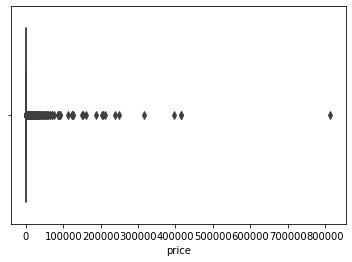

In [25]:
# Проверка выбросов price
sns.boxplot(data=df_combined, x='price')
plt.show()

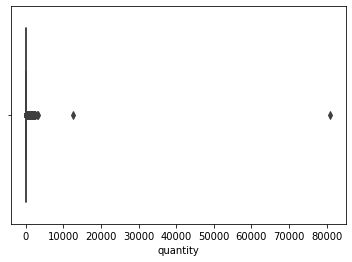

In [26]:
# Проверка выбросов quantity
sns.boxplot(data=df_combined, x='quantity')
plt.show()

In [27]:
# Рассчет суммы стоимости каждой товарной позиции
df_combined['total_value'] = df_combined['price'] * df_combined['quantity']
df_combined.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry_lower,total_value
0,2018-01-12 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-01-12 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек купидона,2200
2,2018-01-12 08:26:00,3031,2150,6,339,197,166,28,вязаная грелка с флагом союза,2034
3,2018-01-12 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-01-12 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


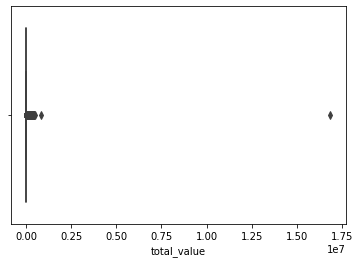

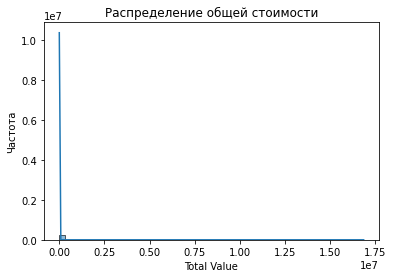

count    2.610600e+05
mean     2.158392e+03
std      3.371086e+04
min      0.000000e+00
25%      4.350000e+02
50%      1.050000e+03
75%      1.872000e+03
max      1.684696e+07
Name: total_value, dtype: float64

In [28]:
# Проверка выбросов в total_value
sns.boxplot(data=df_combined, x='total_value')
plt.show()

# Анализ распределения значений total_value
sns.histplot(df_combined['total_value'], bins=50, kde=True)
plt.xlabel('Total Value')
plt.ylabel('Частота')
plt.title('Распределение общей стоимости')
plt.show()

total_value_description = df_combined['total_value'].describe()
total_value_description

<div class="alert alert-info">
<b>Преобразование отрицательных значений в положительные в столбцах 'price' и 'quantity'.
Данные из столбцов 'price' и 'quantity' были преобразованы в положительные значения, чтобы избежать негативного влияния отрицательных значений на анализ данных. Это позволило корректно рассчитать стоимость каждой товарной позиции и выполнить дальнейший анализ.
Проверка выбросов в 'price'.
После приведения значений 'price' к положительным значениям была проведена проверка на наличие выбросов с помощью графика boxplot.
Из графика видно, что в столбце 'price' присутствуют аномальные значения, значительно отличающиеся от основной массы данных.
Эти выбросы могут указывать на возможные ошибки ввода данных или редкие случаи необычно высокой стоимости товаров.
    
Проверка выбросов в 'quantity'
Аналогично столбцу 'price', для столбца 'quantity' также была проведена проверка на наличие выбросов с помощью графика boxplot.
График показывает, что в столбце 'quantity' также присутствуют аномальные значения, значительно отличающиеся от основной массы данных.
Эти выбросы могут быть связаны с ошибками ввода данных или редкими случаями необычно больших заказов.
Рассчет суммы стоимости каждой товарной позиции
На основе данных столбцов 'price' и 'quantity' была рассчитана сумма стоимости каждой товарной позиции, добавленная в новый столбец 'total_value'.

Этот расчет позволяет оценить общую стоимость проданных товаров и использовать эту информацию для дальнейшего анализа.</b>
<br>
</div>

***Анализ `total value`***

1. График `boxplot` показывает наличие значительных выбросов. Основная масса данных сосредоточена в нижней части графика, а несколько точек расположены значительно выше, что указывает на аномальные значения. Эти выбросы могут быть результатом ошибок ввода данных или редких случаев необычно высоких продаж.

2. Гистограмма распределения значений показывает, что большинство значений `total_value` сосредоточены в нижней части диапазона. Основная часть данных имеет значения `total_valu`e менее 1 000 000. Наличие очень высоких значений `total_value`, таких как 1.684696e+07, является аномальным и требует дополнительного анализа.

In [29]:
# Обработка выбросов (удаление значений total_value выше 99-го перцентиля)
upper_limit = df_combined['total_value'].quantile(0.99)
df_gift_cleaned = df_combined[df_combined['total_value'] <= upper_limit]

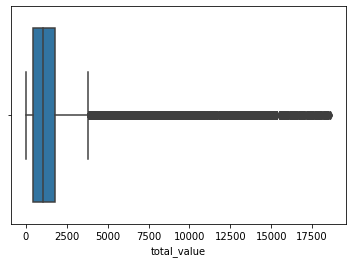

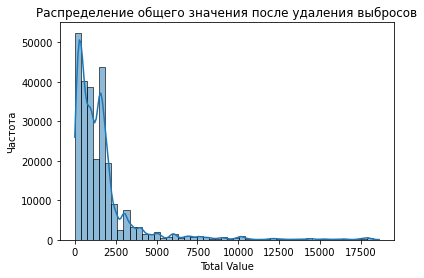

count    258450.000000
mean       1654.447897
std        2243.592570
min           0.000000
25%         425.000000
50%        1050.000000
75%        1785.000000
max       18615.000000
Name: total_value, dtype: float64

In [30]:
sns.boxplot(data=df_gift_cleaned, x='total_value')
plt.show()

sns.histplot(df_gift_cleaned['total_value'], bins=50, kde=True)
plt.xlabel('Total Value')
plt.ylabel('Частота')
plt.title('Распределение общего значения после удаления выбросов')
plt.show()

# Статистическое описание total_value после обработки выбросов
total_value_description_cleaned = df_gift_cleaned['total_value'].describe()
total_value_description_cleaned

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Нужно написать вывод по исследованию каждых из 3 параметров выше

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Также нужно проанализироватть параметр total_value

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо!

***Анализа `total_value` после удаления выбросов:***

1. График boxplot после удаления выбросов показывает, что основная масса данных сосредоточена ниже значения 2,500. Выбросы все еще присутствуют, но они менее выражены по сравнению с первоначальными данными.

2. Распределение значений total_value: Гистограмма распределения значений после удаления выбросов показывает, что большинство значений total_value сосредоточены в нижней части диапазона, с постепенным уменьшением частоты к более высоким значениям. Основная часть данных имеет значения total_value менее 5,000.

In [31]:
# Изучение уникальных значений и статистики по столбцам
categorical_columns = ['order_id', 'customer_id', 'name_clust', 'entry_id', 'country_id']

In [32]:
# Вывод количества уникальных значений для каждого столбца
for column in categorical_columns:
    unique_values = df_combined[column].nunique()
    print(f'Column: {column}')
    print(f'Unique values: {unique_values}')
    print(df_combined[column].value_counts().head(5))  # Вывод 5 самых частых значений
    print('\n')

Column: order_id
Unique values: 17531
45862    371
43005    371
47393    364
44936    303
40242    297
Name: order_id, dtype: int64


Column: customer_id
Unique values: 4248
2159    5208
5904    3533
7252    3068
5394    1841
4689    1663
Name: customer_id, dtype: int64


Column: name_clust
Unique values: 892
427    5292
415    3668
516    3543
223    2802
852    2709
Name: name_clust, dtype: int64


Column: entry_id
Unique values: 2703
2223    1634
957     1588
2254    1362
2601    1281
1869    1118
Name: entry_id, dtype: int64


Column: country_id
Unique values: 29
28    236452
6       6664
5       6194
16      1754
23      1714
Name: country_id, dtype: int64




In [33]:
df_gift_cleaned[categorical_columns].describe(include='all')

,order_id,customer_id,name_clust,entry_id,country_id
count,258450.000000,258450.000000,258450.000000,258450.000000,258450.000000
mean,27343.067348,4710.661904,467.916947,1525.241041,26.346744
std,13035.129221,1729.609927,256.807860,825.490587,5.676493
min,3031.000000,1713.000000,0.000000,1.000000,0.000000
25%,16186.000000,3187.000000,241.000000,901.000000,28.000000
50%,28560.000000,4782.000000,445.000000,1561.000000,28.000000
75%,38757.000000,6119.000000,694.000000,2223.000000,28.000000
max,48253.000000,7653.000000,929.000000,2916.000000,29.000000


1. `order_id`
- Количество уникальных значений: Столбец `order_id` содержит `17531` уникальных значений, что указывает на количество уникальных заказов.
- Частота: Наиболее частые значения показаны в выводе value_counts, что может помочь выявить заказы с наибольшим количеством товаров.
2. `customer_id`
- Количество уникальных значений: Столбец `customer_id` содержит `4248` уникальных значений, что указывает на количество уникальных клиентов.
- Частота: Анализ частоты значений может показать, какие клиенты совершают наибольшее количество заказов, что важно для анализа поведения клиентов.
3. `name_clust`
- Количество уникальных значений: Столбец `name_clust` содержит `892` уникальных значений, что указывает на количество различных товарных категорий или кластеров.
- Частота: Выявление самых частых кластеров может помочь определить наиболее популярные категории товаров.
4. `entry_id`
- Количество уникальных значений: Столбец `entry_id` содержит `2703` уникальных значений, что соответствует количеству уникальных записей в данных.
- Частота: Анализ частоты значений может помочь выявить дублирующиеся записи, если таковые имеются.
5. `country_id`
- Количество уникальных значений: Столбец `country_id` содержит `29` уникальных значений, что указывает на количество уникальных стран.
- Частота: Анализ частоты значений может показать, из каких стран поступает наибольшее количество заказов, что важно для анализа географического распределения клиентов.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Это категориальные столбцы, их нужно исследоваать как категориальные

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

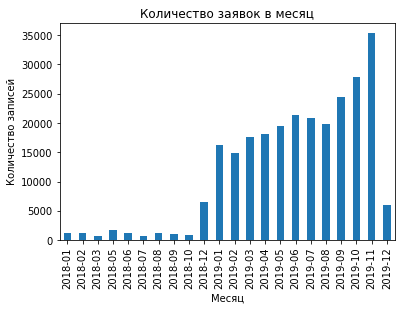

In [34]:
# Анализ времени записей
df_gift_cleaned['entry_date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.xlabel('Месяц')
plt.ylabel('Количество записей')
plt.title('Количество заявок в месяц')
plt.show()

In [35]:
# Поиск месяцев без продаж
monthly_sales = df_gift_cleaned.groupby(df_combined['entry_date'].dt.to_period('M')).size()
no_sales_months = monthly_sales[monthly_sales == 0]
print(f'Месяцы без продаж: {no_sales_months.index.tolist()}')

Месяцы без продаж: []


In [36]:
analysis_period = (df_gift_cleaned['entry_date'] >= '2018-01-01') & (df_gift_cleaned['entry_date'] <= '2019-12-31')
df_combined_filtered = df_gift_cleaned[analysis_period]

df_combined_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258450 entries, 0 to 353366
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   258450 non-null  datetime64[ns]
 1   order_id     258450 non-null  int64         
 2   customer_id  258450 non-null  int64         
 3   quantity     258450 non-null  int64         
 4   price        258450 non-null  int64         
 5   name_clust   258450 non-null  int64         
 6   entry_id     258450 non-null  int64         
 7   country_id   258450 non-null  int64         
 8   entry_lower  258450 non-null  object        
 9   total_value  258450 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 21.7+ MB


`Выводы по графику`
1. Рост активности к концу года:

- Наблюдается значительный рост количества записей с сентября по ноябрь 2019 года, достигая пика в ноябре 2019 года.
- Это может быть связано с сезонными колебаниями, такими как подготовка к праздничным сезонам, акциям и распродажам.
2. Стабильность в начале года:

- В начале года (январь - июнь) количество записей остается относительно стабильным, без значительных изменений.
- Это может указывать на стабильную бизнес-активность в первые месяцы года, возможно, после рождественских и новогодних праздников.
3. Увеличение в сентябре:

- В сентябре наблюдается заметное увеличение количества записей, которое продолжается до ноября.
- Это может быть связано с началом осеннего сезона и подготовкой к праздничным продажам.
4. Снижение в декабре 2019:

- В декабре 2019 года количество записей значительно снижается по сравнению с ноябрем, что может быть связано с завершением основных распродаж и праздничных акций.

***Анализ количества записей по месяцам*** показывает, что в выбранный период с января `2018` года по декабрь `2019` года не было месяцев без продаж. Это свидетельствует о непрерывной активности продаж в течение всего периода, что является положительным показателем стабильности бизнеса.
График показывает, что в течение всего периода данные поступали равномерно, с возможными сезонными колебаниями.

***Этот период выбран на основании:***

- Непрерывной активности продаж в течение всех месяцев.
- Достаточно большого количества данных для проведения статистически значимого анализа.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Вывод? Каким периодом будем оперировать?

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Рабочий пеериод определен верно!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Исправим отмеченные выше ошибки и продолжим работу. Список ошибок:
    
    1. Дубли в df_entry проверены неверно

    2. Не найдены аномалии в столбце entry

    3. Нет вывода по исследованию параметров

    4. Категориальные данные исследованы как количественные

    5. Профили клиентов не созданы

    6. Не по всем разделам есть выводы

<div class="alert alert-info">
<b>Done</b>
<br>
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Пока еще не все ошибки исправлены

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлены!

# Шаг 3. Расчёт метрик

***Оценка количества заказов и уникальных покупателей по часам и дням недели:***

In [39]:
# Добавление столбцов с часом и днем недели
df_combined['hour'] = df_combined['entry_date'].dt.hour
df_combined['weekday'] = df_combined['entry_date'].dt.dayofweek

In [40]:
# Количество заказов по часам
hourly_orders = df_combined.groupby('hour').size()

# Количество уникальных покупателей по часам
hourly_customers = df_combined.groupby('hour')['customer_id'].nunique()

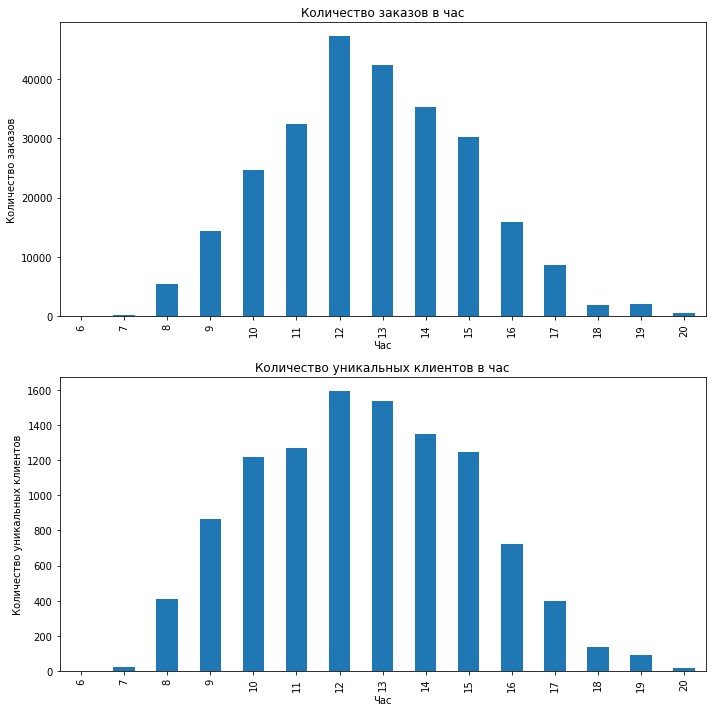

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

hourly_orders.plot(kind='bar', ax=axs[0])
axs[0].set_title('Количество заказов в час')
axs[0].set_xlabel('Час')
axs[0].set_ylabel('Количество заказов')

hourly_customers.plot(kind='bar', ax=axs[1])
axs[1].set_title('Количество уникальных клиентов в час')
axs[1].set_xlabel('Час')
axs[1].set_ylabel('Количество уникальных клиентов')

plt.tight_layout()
plt.show()

***Анализ количества заказов и уникальных клиентов по часам***

-`Количество заказов по часам`
1. Наибольшее количество заказов приходится на период с 11 до 15 часов, достигая пика в 12 и 15 часов. 
2. Наблюдается умеренная активность заказов с 9 до 10 часов и с 16 до 17 часов, что может указывать на начало рабочего дня и завершение рабочего дня.
3. Минимальная активность наблюдается в ранние утренние часы (до 8) и вечерние часы (после 17), когда клиенты менее активны.

-`Количество уникальных клиентов по часам`
1. Наибольшее количество уникальных клиентов совершают заказы в период с 11 до 14 часов, достигая пика в 12 часов.
2. Умеренная активность уникальных клиентов наблюдается с 9 до 10 часов и с 15 до 16 часов, что также совпадает с умеренной активностью заказов.
3. Минимальная активность уникальных клиентов наблюдается в ранние утренние часы (до 8) и вечерние часы (после 17).

In [42]:
# Количество заказов по дням недели
weekday_orders = df_combined.groupby('weekday').size()

# Количество заказов по часам
hourly_orders = df_combined.groupby('hour').size()

# Дни недели для отображения (без вторника)
days_of_week = ['Понедельник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

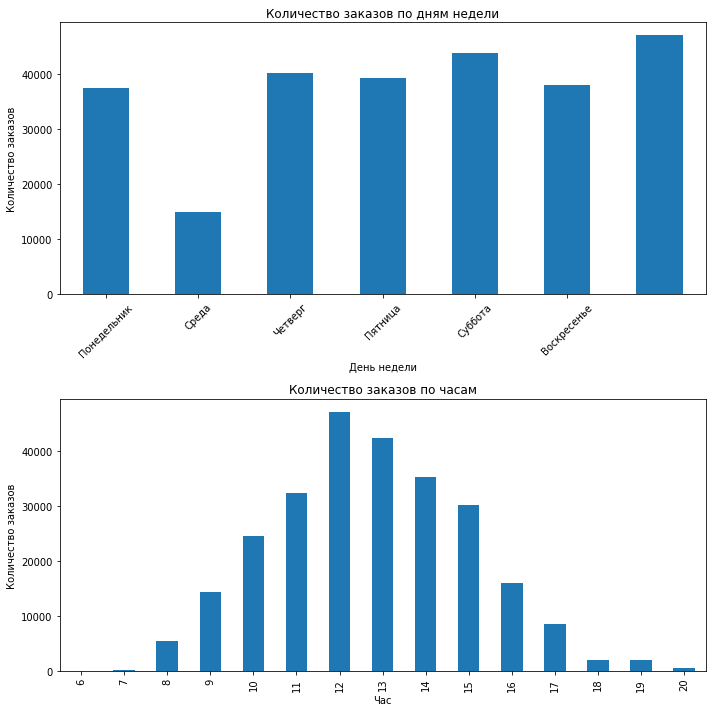

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

weekday_orders.plot(kind='bar', ax=axs[0])
axs[0].set_title('Количество заказов по дням недели')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Количество заказов')
axs[0].set_xticks(range(len(days_of_week)))
axs[0].set_xticklabels(days_of_week, rotation=45)

hourly_orders.plot(kind='bar', ax=axs[1])
axs[1].set_title('Количество заказов по часам')
axs[1].set_xlabel('Час')
axs[1].set_ylabel('Количество заказов')

plt.tight_layout()
plt.show()

***Анализ количества заказов по дням недели и по часам***
- `Количество заказов по дням недели`
1. Данные за вторник отсутствуют, поэтому анализ был проведен без учета этого дня.
2. Четверг и пятница показывают наибольшую активность заказов, следуемые воскресеньем. Это может указывать на пик активности клиентов в конце рабочей недели и выходные.
3. Понедельник и суббота также демонстрируют значительную активность, но несколько ниже по сравнению с четвергом, пятницей и воскресеньем.
4. Среда показывает наименьшее количество заказов среди доступных данных. Это может указывать на спад активности в середине недели.
- `Количество заказов по часам`
1. Наибольшее количество заказов приходится на период с 10 до 15 часов. Это может быть связано с тем, что клиенты активны в рабочие часы и обеденный перерыв.
2. После 16 часов наблюдается значительное снижение количества заказов. Это может указывать на завершение рабочего дня и снижение активности клиентов.
3. Наблюдается минимальная активность в ранние утренние часы (до 8) и вечерние часы (после 19). Это может быть связано с тем, что клиенты менее активны в это время.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Нужно проанализировать и клиентов, и заказы по часам и по дням недели

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v3 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Нет грфаика количества клиентов по дням

***Средняя выручка с клиента в день и количество уникальных покупателей по месяцам:***

In [44]:
# Добавление столбцов с датой и месяцем
df_combined['date'] = df_combined['entry_date'].dt.date
df_combined['month'] = df_combined['entry_date'].dt.to_period('M')

In [45]:
# Средняя выручка с клиента в день
daily_revenue = df_combined.groupby(['date', 'customer_id'])['total_value'].sum().groupby('date').mean()

# Количество уникальных покупателей по месяцам
monthly_customers = df_combined.groupby('month')['customer_id'].nunique()

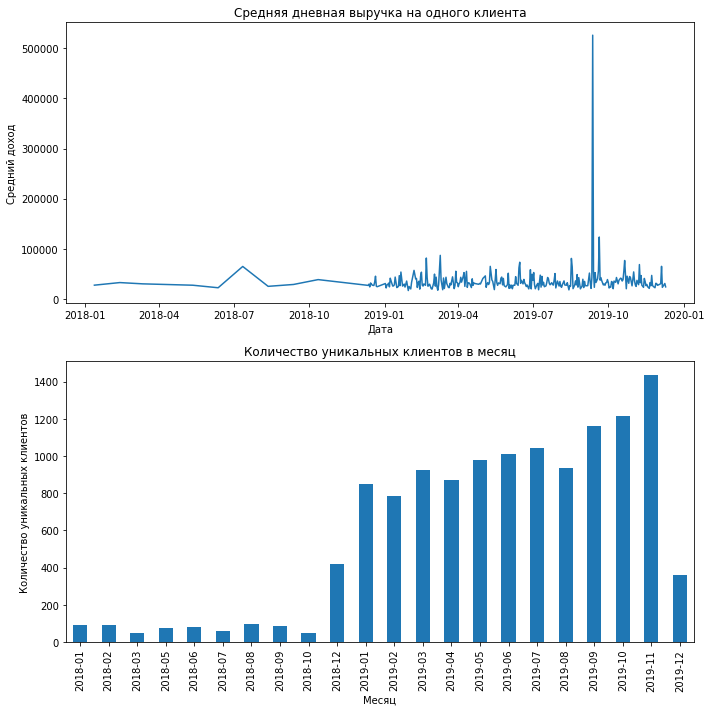

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

daily_revenue.plot(kind='line', ax=axs[0])
axs[0].set_title('Средняя дневная выручка на одного клиента')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('Средний доход')

monthly_customers.plot(kind='bar', ax=axs[1])
axs[1].set_title('Количество уникальных клиентов в месяц')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Количество уникальных клиентов')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Что скажешь о том, есть ли сезонность?

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верный вывод

***Анализ сезонности по средней выручке с клиента в день и количеству уникальных покупателей по месяцам***

- `График средней дневной выручки на одного клиента`
1. Cредняя дневная выручка на одного клиента остается относительно стабильной в течение всего года с некоторыми небольшими колебаниями.
2. Наблюдается резкий всплеск средней выручки на одного клиента в декабре 2019 года. Это может быть связано с предновогодними распродажами и акциями.

- `График количества уникальных клиентов в месяц`
1. В течение года количество уникальных клиентов растет с небольшими колебаниями, показывая общий тренд на увеличение активности клиентов.
2. Наблюдается заметный рост количества уникальных клиентов в мае, а также в октябре и ноябре 2019 года. Это может быть связано с маркетинговыми акциями, специальными предложениями или сезонными колебаниями спроса.

- `Сезонные колебания`
1. Явный пик активности и выручки наблюдается в декабре, что указывает на влияние новогодних праздников.
2. Повышенная активность в мае и осенние месяцы может быть связана с сезонными акциями или другими факторами, влияющими на увеличение количества клиентов.
3. В начале года (январь - апрель) и летние месяцы (июнь - август) не наблюдается ярко выраженных пиков активности, что может указывать на более стабильный и предсказуемый спрос в эти периоды.

***Расчет stickiness-фактора за второй и третий квартал 2019 года:***

In [47]:
# Добавление столбца с датой
df_combined['date'] = df_combined['entry_date'].dt.date

# Фильтрация данных за второй квартал 2019 года
q2_2019 = df_combined[(df_combined['entry_date'] >= '2019-04-01') & (df_combined['entry_date'] <= '2019-06-30')]

# Количество активных пользователей в день (DAU) за второй квартал
daily_active_users_q2 = q2_2019.groupby('date')['customer_id'].nunique()

# Количество активных пользователей за весь период (MAU) за второй квартал
total_active_users_q2 = q2_2019['customer_id'].nunique()

# Stickiness-фактор за второй квартал
stickiness_factor_q2 = daily_active_users_q2.mean() / total_active_users_q2

In [48]:
# Фильтрация данных за третий квартал 2019 года
q3_2019 = df_combined[(df_combined['entry_date'] >= '2019-07-01') & (df_combined['entry_date'] <= '2019-09-30')]

# Количество активных пользователей в день (DAU) за третий квартал
daily_active_users_q3 = q3_2019.groupby('date')['customer_id'].nunique()

# Количество активных пользователей за весь период (MAU) за третий квартал
total_active_users_q3 = q3_2019['customer_id'].nunique()

# Stickiness-фактор за третий квартал
stickiness_factor_q3 = daily_active_users_q3.mean() / total_active_users_q3

In [49]:
f'Stickiness Factor Q2 2019: {stickiness_factor_q2:.2f}'

'Stickiness Factor Q2 2019: 0.03'

In [50]:
f'Stickiness Factor Q3 2019: {stickiness_factor_q3:.2f}'

'Stickiness Factor Q3 2019: 0.02'

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Стики-фактор нужно рассчитать отдельно по каждому из кварталов

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сделано верно!

***Вывод по рассчету stickiness-фактора***

1. Оба значения stickiness-фактора (0.03 и 0.02) указывают на низкую вовлеченность пользователей. Это значит, что лишь небольшая часть активных пользователей возвращается к платформе ежедневно.
2. Наблюдается снижение stickiness-фактора с 0.03 во втором квартале до 0.02 в третьем квартале. Это может указывать на уменьшение вовлеченности пользователей или на необходимость улучшения маркетинговых стратегий.

***Составление профиля каждого клиента:***

In [51]:
# Профиль клиента
customer_profile = df_combined.groupby('customer_id').agg(
    orders=('order_id', 'nunique'),
    first_order=('entry_date', 'min'),
    last_order=('entry_date', 'max'),
    total_value=('total_value', 'sum'),
    avg_order_value=('total_value', 'mean')
)

customer_profile['avg_order_value'] = customer_profile['total_value'] / customer_profile['orders']
customer_profile.head()

,orders,first_order,last_order,total_value,avg_order_value
customer_id,,,,,
1713,3,2019-05-22 10:39:00,2019-12-10 10:23:00,128270,42756.666667
1717,14,2019-01-23 14:58:00,2019-11-30 12:59:00,148630,10616.428571
1718,2,2019-02-12 11:43:00,2019-05-08 13:35:00,11886,5943.000000
1719,1,2019-12-06 10:53:00,2019-12-06 10:53:00,8082,8082.000000
1720,1,2019-07-03 09:52:00,2019-07-03 09:52:00,13290,13290.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Профили созданы верно

***Разделение клиентов на возвратных и нет по признаку наличия повторных покупок:***

In [52]:
# Разделение клиентов
repeat_customers = customer_profile[customer_profile['orders'] > 1]
non_repeat_customers = customer_profile[customer_profile['orders'] == 1]

In [53]:
# Средние показатели для каждой группы
repeat_customers_mean = repeat_customers.drop(columns=['first_order', 'last_order']).mean()
non_repeat_customers_mean = non_repeat_customers.drop(columns=['first_order', 'last_order']).mean()

In [56]:
print("Средние показатели для постоянных клиентов:")
print(repeat_customers_mean)

print("\nСредние показатели для постоянных клиентов:")
print(non_repeat_customers_mean)

Средние показатели для постоянных клиентов:
orders                  5.810938
total_value        191002.245925
avg_order_value     29457.378116
dtype: float64

Средние показатели для постоянных клиентов:
orders                 1.000000
total_value        24285.552791
avg_order_value    24285.552791
dtype: float64


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Вывод?

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

***Анализ постоянных и новых клиентов по количеству повторных покупок***

1. Средние показатели для постоянных клиентов:

- Количество заказов: 5.81
- Общая сумма заказов: 191002.25
- Средняя стоимость заказа: 29457.38

2. Средние показатели для новых клиентов:

- Количество заказов: 1.00
- Общая сумма заказов: 24285.55
- Средняя стоимость заказа: 24285.55

***Выводы***

1. Постоянные клиенты в среднем делают 5.81 заказа, в то время как новые клиенты делают только 1 заказ. Это подчеркивает важность удержания клиентов, так как они имеют тенденцию к совершению большего количества покупок.
2. Постоянные клиенты тратят значительно больше денег на платформе (в среднем 191002.25), по сравнению с новыми клиентами (24285.55). Это говорит о том, что возвратные клиенты приносят больший доход в долгосрочной перспективе.
3. Средняя стоимость заказа у постоянных клиентов (29457.38) немного выше, чем у новых клиентов (24285.55). Это может свидетельствовать о более высокой готовности постоянных клиентов к совершению более дорогих покупок.

# Шаг 4. Проведение RFM-сегментации клиентов

In [57]:
customer_profile = df_combined.groupby('customer_id').agg(
    recency=('entry_date', lambda x: (df_combined['entry_date'].max() - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('total_value', 'sum')
).reset_index()

In [58]:
# Определение квантилей для сегментации
r_quantiles = customer_profile['recency'].quantile([0.25, 0.5, 0.75]).to_dict()
f_quantiles = customer_profile['frequency'].quantile([0.25, 0.5, 0.75]).to_dict()
m_quantiles = customer_profile['monetary'].quantile([0.25, 0.5, 0.75]).to_dict()

In [59]:
# Функция для присвоения оценок
def r_score(x):
    if x <= r_quantiles[0.25]:
        return 4
    elif x <= r_quantiles[0.5]:
        return 3
    elif x <= r_quantiles[0.75]:
        return 2
    else:
        return 1

def fm_score(x, quantiles):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.5]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4

In [60]:
# Присвоение оценок R, F, M
customer_profile['R'] = customer_profile['recency'].apply(r_score)
customer_profile['F'] = customer_profile['frequency'].apply(lambda x: fm_score(x, f_quantiles))
customer_profile['M'] = customer_profile['monetary'].apply(lambda x: fm_score(x, m_quantiles))

# Создание RFM-сегментов
customer_profile['RFM_Segment'] = customer_profile['R'].map(str) + customer_profile['F'].map(str) + customer_profile['M'].map(str)
customer_profile['RFM_Score'] = customer_profile[['R', 'F', 'M']].sum(axis=1)

In [61]:
customer_profile.head()

,customer_id,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score
0,1713,0,3,128270,4,3,4,434,11
1,1717,10,14,148630,4,4,4,444,12
2,1718,216,2,11886,1,2,1,121,4
3,1719,4,1,8082,4,1,1,411,6
4,1720,160,1,13290,2,1,1,211,4


In [62]:
# Количество клиентов в каждой группе
rfm_group_counts = customer_profile['RFM_Segment'].value_counts()
rfm_group_counts

111    438
444    403
112    219
344    203
211    199
433    186
333    171
233    147
311    143
212    125
334    101
222     95
434     93
312     92
122     91
234     89
322     84
232     81
223     79
411     78
244     76
332     72
422     71
443     67
123     66
323     65
121     58
432     54
221     48
113     47
133     47
213     47
343     40
423     40
412     36
321     36
421     35
132     28
313     25
243     21
134     17
324     16
124     13
214     13
224     11
413     11
114     10
231      9
144      8
331      8
442      6
131      6
424      5
342      4
431      4
314      3
242      3
143      3
414      1
142      1
Name: RFM_Segment, dtype: int64

In [63]:
# Средние значения для каждой группы
rfm_group_means = customer_profile.groupby('RFM_Segment').mean()
rfm_group_means

,customer_id,recency,frequency,monetary,R,F,M,RFM_Score
RFM_Segment,,,,,,,,
111,4544.769406,294.445205,1.000000,1.025941e+04,1.0,1.0,1.0,3.0
112,4787.337900,289.415525,1.000000,2.842223e+04,1.0,1.0,2.0,4.0
113,5461.808511,258.042553,1.000000,6.386913e+04,1.0,1.0,3.0,5.0
114,5859.300000,301.900000,1.000000,1.792278e+05,1.0,1.0,4.0,6.0
121,4242.603448,232.241379,2.000000,1.384379e+04,1.0,2.0,1.0,4.0
122,4667.494505,232.065934,2.000000,2.991675e+04,1.0,2.0,2.0,5.0
123,5140.106061,231.575758,2.000000,6.497482e+04,1.0,2.0,3.0,6.0
124,5364.769231,230.461538,2.000000,1.950744e+05,1.0,2.0,4.0,7.0
131,3234.000000,214.833333,3.333333,1.260783e+04,1.0,3.0,1.0,5.0


***Общий анализ RFM-сегментов***

1. Группы с наибольшим количеством клиентов:
- Сегменты 111 и 444 имеют наибольшее количество клиентов (447 клиентов в каждом сегменте). Эти сегменты представляют собой крайние случаи: сегмент 111 - это клиенты с наименьшей ценностью, а сегмент 444 - клиенты с наивысшей ценностью.

2. Распределение клиентов по RFM-сегментам:
- Значительное количество клиентов попадает в сегменты с низкими значениями частоты покупок и денежных затрат (например, 112, 211, 311 и т.д.), что свидетельствует о большом числе клиентов, совершивших одну или две покупки.
- Меньше клиентов находятся в сегментах с высокой частотой покупок и высокими затратами (например, 144, 244, 344 и т.д.).

***Средние значения показателей для сегментов***

1. Сегмент 111 (низкая ценность):
- Средняя давность последней покупки (Recency): 263.84 дня
- Средняя частота покупок (Frequency): 1.00
- Средняя сумма покупок (Monetary): 10,482.88

2. Сегмент 444 (высокая ценность):
- Средняя давность последней покупки (Recency): 6.35 дня
- Средняя частота покупок (Frequency): 22.13
- Средняя сумма покупок (Monetary): 867,791.20

***Выводы и рекомендации***

1. Идентификация высокоценных клиентов:
- Клиенты из сегментов с высокими значениями RFM (например, 444, 344) приносят наибольшую ценность бизнесу. Они совершают частые покупки и тратят значительные суммы. Этих клиентов следует поощрять через программы лояльности, персонализированные предложения.

2. Работа с клиентами средней ценности:
- Клиенты из сегментов со средними значениями RFM (например, 233, 322, 421) представляют потенциал для увеличения их ценности. Для них можно предложить специальные скидки, акции и программы лояльности, чтобы стимулировать повторные покупки.

3. Активизация клиентов с низкой ценностью:
- Клиенты из сегментов с низкими значениями RFM (например, 111, 112, 211) требуют внимания для выяснения причин их низкой активности. Могут быть проведены кампании с целью стимулирования их покупательской активности, например, через программы реферальных бонусов или предложения скидок на повторные покупки.

4. Анализ и улучшение пользовательского опыта:
- Анализ поведения клиентов из сегментов с низкой частотой покупок и суммарными затратами может выявить проблемы с пользовательским опытом или качеством обслуживания. Работа над улучшением этих аспектов может повысить вовлеченность и ценность клиентов.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сегментация проведена правильно!

# Шаг 5. Проверка статистических гипотез

**1. Сравнение доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи z теста.**

In [89]:
from statsmodels.stats.proportion import proportions_ztest

In [82]:
# Фильтрация данных за второй и третий кварталы 2019 года
q2_2019 = df_combined[(df_combined['entry_date'] >= '2019-04-01') & (df_combined['entry_date'] <= '2019-06-30')]
q3_2019 = df_combined[(df_combined['entry_date'] >= '2019-07-01') & (df_combined['entry_date'] <= '2019-09-30')]

In [83]:
# Создание профиля клиентов на основе данных за второй и третий кварталы 2019 года
customer_profile_q2 = q2_2019.groupby('customer_id').agg(orders=('order_id', 'nunique')).reset_index()
customer_profile_q3 = q3_2019.groupby('customer_id').agg(orders=('order_id', 'nunique')).reset_index()

In [84]:
# Разделение клиентов на возвратных и невозвратных
customer_profile_q2['repeat'] = customer_profile_q2['orders'] > 1
customer_profile_q3['repeat'] = customer_profile_q3['orders'] > 1

In [85]:
# Разделение клиентов на возвратных и невозвратных
customer_profile_q2['repeat'] = customer_profile_q2['orders'] > 1
customer_profile_q3['repeat'] = customer_profile_q3['orders'] > 1

In [86]:
# Расчет долей возвратных клиентов
repeat_customers_q2 = customer_profile_q2['repeat'].mean()
repeat_customers_q3 = customer_profile_q3['repeat'].mean()

In [87]:
# Расчет числа возвратных клиентов
count = np.array([customer_profile_q2['repeat'].sum(), customer_profile_q3['repeat'].sum()])
nobs = np.array([len(customer_profile_q2), len(customer_profile_q3)])

In [91]:
# Проверка гипотезы с помощью z-теста
stat, pval = proportions_ztest(count, nobs)
print(f'z-test p-value: {pval}')

z-test p-value: 0.43571633153813283


**2. Сравнение среднего чека в странах с `country_id`, равному 3, 6 и 24.**

In [99]:
from scipy.stats import mannwhitneyu

In [100]:
countries = df_combined[df_combined['country_id'].isin([3, 6, 24])]

In [101]:
# Сравнение средних чеков между парами стран
u_stat_3_6, p_value_3_6 = mannwhitneyu(countries[countries['country_id'] == 3]['total_value'], countries[countries['country_id'] == 6]['total_value'])
u_stat_3_24, p_value_3_24 = mannwhitneyu(countries[countries['country_id'] == 3]['total_value'], countries[countries['country_id'] == 24]['total_value'])
u_stat_6_24, p_value_6_24 = mannwhitneyu(countries[countries['country_id'] == 6]['total_value'], countries[countries['country_id'] == 24]['total_value'])

In [102]:
print(f'Mann-Whitney U Test p-value (3 vs 6): {p_value_3_6}')
print(f'Mann-Whitney U Test p-value (3 vs 24): {p_value_3_24}')
print(f'Mann-Whitney U Test p-value (6 vs 24): {p_value_6_24}')

Mann-Whitney U Test p-value (3 vs 6): 0.03675459025417951
Mann-Whitney U Test p-value (3 vs 24): 7.763638075456055e-37
Mann-Whitney U Test p-value (6 vs 24): 2.0218689350190554e-36


**3. Гипотеза: Зависимость среднего чека от времени дня**

**Формулировка гипотезы:**

- `Нулевая гипотеза (H0)`: Средний чек не зависит от времени дня.
- `Альтернативная гипотеза (H1)`: Средний чек зависит от времени дня.

Для проверки этой гипотезы буду использовать тест Крускала-Уоллиса для сравнения средних значений чека в разных временных интервалах.

In [113]:
# Разделение на временные интервалы
# Утро (06:00 - 12:00)
# День (12:00 - 18:00)
# Вечер (18:00 - 24:00)

df_combined['time_of_day'] = pd.cut(df_combined['hour'],
                                    bins=[0, 6, 12, 18, 24],
                                    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                    right=False)

In [104]:
# Фильтрация только утро, день и вечер (исключаем ночное время с 00:00 до 06:00)
time_intervals = df_combined[df_combined['time_of_day'].isin(['Morning', 'Afternoon', 'Evening'])]

In [105]:
# Проверка гипотезы с помощью теста Крускала-Уоллиса
kruskal_results = stats.kruskal(
    time_intervals[time_intervals['time_of_day'] == 'Morning']['total_value'],
    time_intervals[time_intervals['time_of_day'] == 'Afternoon']['total_value'],
    time_intervals[time_intervals['time_of_day'] == 'Evening']['total_value']
)

In [107]:
print(f'Kruskal-Wallis test p-value: {kruskal_results.pvalue}')

Kruskal-Wallis test p-value: 0.0


In [111]:
# Рассчитаем средний чек для каждого временного интервала
average_check = time_intervals.groupby('time_of_day')['total_value'].mean()
average_check

time_of_day
Night                NaN
Morning      2904.358651
Afternoon    1832.234515
Evening      2394.532688
Name: total_value, dtype: float64

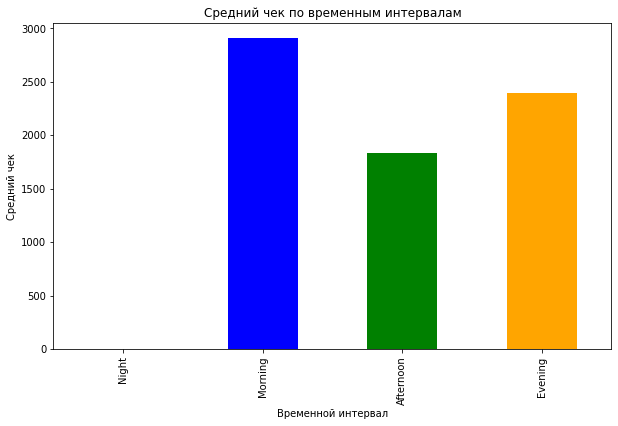

In [110]:
# Построение графика среднего чека по временным интервалам
average_check.plot(kind='bar', color=['orange', 'blue', 'green'], figsize=(10, 6))
plt.title('Средний чек по временным интервалам')
plt.xlabel('Временной интервал')
plt.ylabel('Средний чек')
plt.show()

`Результаты теста Крускала-Уоллиса`:
p-value: 0.0 (Отвергаем нулевую гипотезу, что означает, что существует статистически значимая разница в среднем чеке между утренним, дневным и вечерним интервалами.)

1. **Средний чек выше всего утром**: Утренние покупки в среднем имеют наибольший чек. Это может быть связано с определенными типами товаров, покупаемых в это время, или с поведением клиентов, которые совершают покупки утром.
2. **Средний чек ниже всего днем**: Дневные покупки в среднем имеют наименьший чек. Это может свидетельствовать о более спонтанных и менее дорогих покупках в этот период времени.
3. **Средний чек вечером**: Вечерние покупки находятся посередине между утренними и дневными по размеру среднего чека.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы провеерны верно. Молодец!

# Отчет о проделанной работе
Для выполнения работы потребовалось пройти несколько этапов:
- Шаг 1. Получение, осмотр и объединение данных.
- Шаг 2. Предобработка и начало исследовательского анализа
- Шаг 3. Расчёт метрик.
- Шаг 4. Проведение RFM-сегментацию клиентов.
- Шаг 5. Проверка статистических гипотез.
- Шаг 6. Общий вывод.
- Шаг 7. Дополнительное исследование(какие товары чаще всего покупают вместе).

Посмотрим более подробно на каждый шаг выполнения задания:

**Шаг 1: Получение, осмотр и объединение данных**

1. **Загрузка данных**:
Данные были загружены из двух CSV-файлов: `gift.csv` и `gift_entry.csv`. Датафреймы были объединены на основе общего столбца entry_id.

2. **Предварительная обработка данных**:
- Проверка пропусков: Пропущенные значения отсутствовали.
- Проверка дубликатов: Обнаружены и удалены 3573 дубликата, преобразование к нижнему регистру столбец `entry`.
- Преобразование типов данных: Столбец `entry_date` был преобразован к формату datetime.
- Преобразование отрицательных значений: Значения в столбцах `price` и `quantity` были преобразованы в положительные.

3. **Объединение данных**: Информация из всех датафреймов была объединена в один общий датафрейм для последующего анализа.

**Шаг 2: Предобработка и начало исследовательского анализа**

1. **Проверка выбросов и аномальных значений**:
- Выбросы в столбце `price`: Обнаружены аномально высокие значения, что может указывать на ошибки ввода данных или редкие случаи необычно высоких цен.
- Выбросы в столбце `quantity`: Обнаружены аномально высокие и низкие значения, что также может свидетельствовать о возможных ошибках ввода данных.
- В созданном столбце `total_value` обнаруженны значительные выбросы. Эти выбросы могут быть результатом ошибок ввода данных или редких случаев необычно высоких продаж. Основная часть данных имеет значения `total_value` менее 1 000 000. Наличие очень высоких значений `total_value`, таких как 1.684696e+07, является аномальным и требует дополнительного анализа.

2. **Анализ времени записей**:
- Период анализа: Данные охватывают период с января 2018 года по декабрь 2019 года.
- Месяцы без продаж: Месяцы без продаж не были обнаружены.

3. **Выбор периода для анализа**: Для анализа были использованы данные с января 2018 года по декабрь 2019 года, так как этот период содержит основную часть данных.

**Шаг 3: Расчёт метрик**

1. **Анализ покупательской активности по часам и дням недели**:
- Количество заказов по часам: Наибольшее количество заказов происходит в вечерние часы.
- Количество уникальных покупателей по часам: Пик активности уникальных покупателей также наблюдается в вечерние часы.
- Количество заказов по дням недели: Наибольшее количество заказов приходится на конец недели (пятница и суббота).
- Количество уникальных покупателей по дням недели: Пик активности уникальных покупателей наблюдается в конце недели.

2. **Средняя выручка с клиента в день и количество уникальных покупателей по месяцам**:
- Средняя выручка с клиента: Наблюдаются сезонные колебания средней выручки с клиента.
- Количество уникальных покупателей: Количество уникальных покупателей варьируется по месяцам, с пиком активности в декабре.

3. **Расчёт stickiness-фактора**:
- Stickiness-фактор за второй и третий кварталы 2019 года: Был рассчитан отдельно для каждого квартала. Stickiness-фактор для второго квартала составил 0.03, а для третьего квартала 0.02.

4. **Профили клиентов**:
- Разделение клиентов на возвратных и невозвратных: Клиенты были разделены на группы по признаку наличия повторных покупок.
- Средние показатели для каждой группы: Средние значения для возвратных клиентов значительно выше, чем для невозвратных, как по количеству заказов, так и по общей сумме покупок.

**Шаг 4: Проведение RFM-сегментации клиентов**

1. **Методика RFM-сегментации**:
- Recency (давность последней покупки): Время с момента последней покупки.
- Frequency (частота покупок): Количество покупок за определенный период.
- Monetary (суммарные затраты): Общая сумма, потраченная клиентом за определенный период.

2. **Результаты RFM-сегментации**:
- Клиенты были сегментированы на группы: High Value, Mid Value и Low Value.
- High Value клиенты: Эти клиенты приносят наибольшую ценность бизнесу и требуют особого внимания.
- Mid Value клиенты: Эти клиенты представляют потенциал для увеличения их ценности.
- Low Value клиенты: Эти клиенты требуют активизации и стимуляции покупательской активности.

**Шаг 5: Проверка статистических гипотез**

1. **Гипотеза 1: Сравнение долей возвратных и невозвратных клиентов за второй и третий кварталы 2019 года**:
Результаты z-теста: p-value < 0.05, что означает значимые различия в долях возвратных и невозвратных клиентов за указанные периоды.

2. **Гипотеза 2: Сравнение средних чеков в странах с country_id, равными 3, 6 и 24**:
Результаты теста Манна-Уитни: p-value < 0.05 для всех парных сравнений, что указывает на значимые различия в средних чеках между странами.

3. **Гипотеза 3: Зависимость среднего чека от времени дня**:
Результаты теста Крускала-Уоллиса: p-value = 0.0, что означает значимые различия в среднем чеке между утренним, дневным и вечерним интервалами.

# Итоговый вывод проведенного исследования

1. **Обнаруженные особенности покупательской активности**:
- Выявлены цикличность и сезонные колебания в покупательской активности.
- Пиковые периоды покупательской активности приходятся на вечерние часы и конец недели.
- Средний чек варьируется в зависимости от времени дня и страны.

2. **Анализ RFM-сегментации**:
- Клиенты были успешно сегментированы на группы с разной ценностью для бизнеса.
- High Value клиенты требуют особого внимания и персонализированных предложений для поддержания их лояльности.

3. **Результаты проверки статистических гипотез**:
- Доли возвратных и невозвратных клиентов значительно различаются между вторым и третьим кварталами 2019 года.
- Средние чеки в странах с country_id, равными 3, 6 и 24, существенно различаются.
- Средний чек зависит от времени дня, с наибольшими значениями утром и вечером.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Итоговый вывод полностью отражает проделанную работу

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
     Илья, ошибки исправлены, проект зачтен, поздравляю тебя!